# LOESS Smoothing Time Series

Smoothing a time series may be useful in:

- Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.
- The smoothed version of series can be used as a feature to explain the original series itself.
- Visualize the underlying trend better

Methods:

- Moving averages
- LOESS smoothing (localized regression)
- LOWESS smoothing (locally weighted regression)

## Moving averages

Moving average is nothing but the average of a rolling window of defined width. But you must choose the window-width wisely, because, large window-size will over-smooth the series. For example, a window-size equal to the seasonal duration (ex: 12 for a month-wise series), will effectively nullify the seasonal effect.

## LOESS (LOcalized regrESSion)

LOESS fits multiple regressions in the local neighborhood of each point. It is implemented in the `statsmodels` package, where you can control the degree of smoothing using `frac` argument which specifies the percentage of data points nearby that should be considered to fit a regression model.

## Example

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load data
url = "https://raw.githubusercontent.com/selva86/datasets/master/elecequip.csv"
df_original = pd.read_csv(url, parse_dates=["date"], index_col="date")
df_original

,value
date,
1996-01-01,79.35
1996-02-01,75.78
1996-03-01,86.32
1996-04-01,72.60
1996-05-01,74.86
...,...
2011-11-01,93.37
2011-12-01,98.34
2012-01-01,86.44


In [3]:
# moving average
df_ma = df_original.loc[:, "value"].rolling(3, center=True, closed="both").mean()

In [4]:
# LOESS smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_original.loc[:, "value"], 
                                 np.arange(len(df_original.loc[:, "value"])),
                                 frac=0.05)[:, 1], 
                          index=df_original.index, 
                          columns=["value"])

df_loess_15 = pd.DataFrame(lowess(df_original.loc[:, "value"], 
                                 np.arange(len(df_original.loc[:, "value"])),
                                 frac=0.15)[:, 1], 
                          index=df_original.index, 
                          columns=["value"])

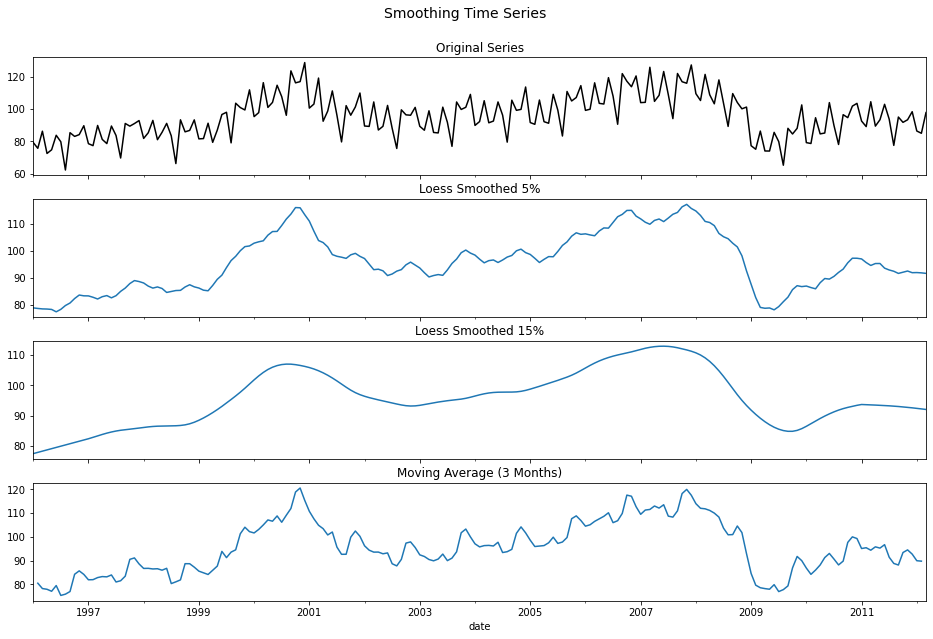

In [5]:
# plot 
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(16, 10), sharex=True)
df_original['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3 Months)')
fig.suptitle('Smoothing Time Series', y=0.95, fontsize=14)
plt.show()